## All workers Time Series Forecasts

In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import joblib
# import os

# # Load the data
# data_path = '/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv'
# df = pd.read_csv(data_path)

# # Convert Date column to datetime and set as index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Identify and drop duplicate dates, keeping the first occurrence
# df = df[~df.index.duplicated(keep='first')]

# # Ensure the index has a defined frequency (assuming daily data here)
# df = df.asfreq('D')  # 'D' denotes daily frequency; adjust if necessary

# # Fill missing values if any
# df = df.fillna(method='ffill').fillna(method='bfill')

# # List of defect types to model
# defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# # Directories for saving models and forecasts
# forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_forecasts_dataset'
# model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model'
# os.makedirs(forecast_output_dir, exist_ok=True)
# os.makedirs(model_output_dir, exist_ok=True)

# def train_arima_model(data, order=(1, 1, 1), steps=5):
#     """Train an ARIMA model and forecast future data."""
#     model = ARIMA(data, order=order)
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=steps)
#     return model_fit, forecast

# def calculate_rmse(actual, forecast):
#     """Calculate Root Mean Squared Error between actual and forecasted values."""
#     mse = mean_squared_error(actual, forecast)
#     rmse = np.sqrt(mse)
#     return rmse

# # Prepare DataFrame to store forecasts
# time_series_forecasts = pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=6, freq='D')[1:])

# # Train ARIMA models for each defect type and make forecasts
# for defect_type in defect_types:
#     print(f"Training ARIMA model for {defect_type}...")
#     try:
#         # Train the model and make forecast
#         model_fit, forecast = train_arima_model(df[defect_type], order=(1, 1, 1), steps=5)
#         time_series_forecasts[defect_type] = forecast

#         # Calculate and print RMSE if there are enough data points
#         if len(df[defect_type]) >= 5:
#             rmse = calculate_rmse(df[defect_type][-5:], forecast)
#             print(f"RMSE for {defect_type}: {rmse}")

#         # Plotting the results
#         plt.figure(figsize=(12, 6))
#         plt.plot(df.index, df[defect_type], label='Observed', color='blue')
#         future_dates = pd.date_range(start=df.index[-1], periods=6, freq='D')[1:]
#         plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
#         plt.title(f'Future forecast for {defect_type}')
#         plt.xlabel('Date')
#         plt.ylabel(f'{defect_type} Count')
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()

#         # Save the model
#         model_file = os.path.join(model_output_dir, f'arima_model_{defect_type}.pkl')
#         joblib.dump(model_fit, model_file)
#     except Exception as e:
#         print(f"An error occurred for {defect_type}: {e}")

# # Save all forecasts to a CSV file
# forecast_file_path = os.path.join(forecast_output_dir, 'time_series_forecasts.csv')
# time_series_forecasts.to_csv(forecast_file_path)
# print(f"Forecasts saved to {forecast_file_path}")

Training ARIMA model for Run_Off...
RMSE for Run_Off: 4.347773701187655
Metrics for Run_Off:
  - Accuracy: 0.8
  - Precision: 0.8
  - Recall: 1.0
  - F1 Score: 0.8888888888888888
----------------------------------------------------------------


/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_78007/4106626249.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


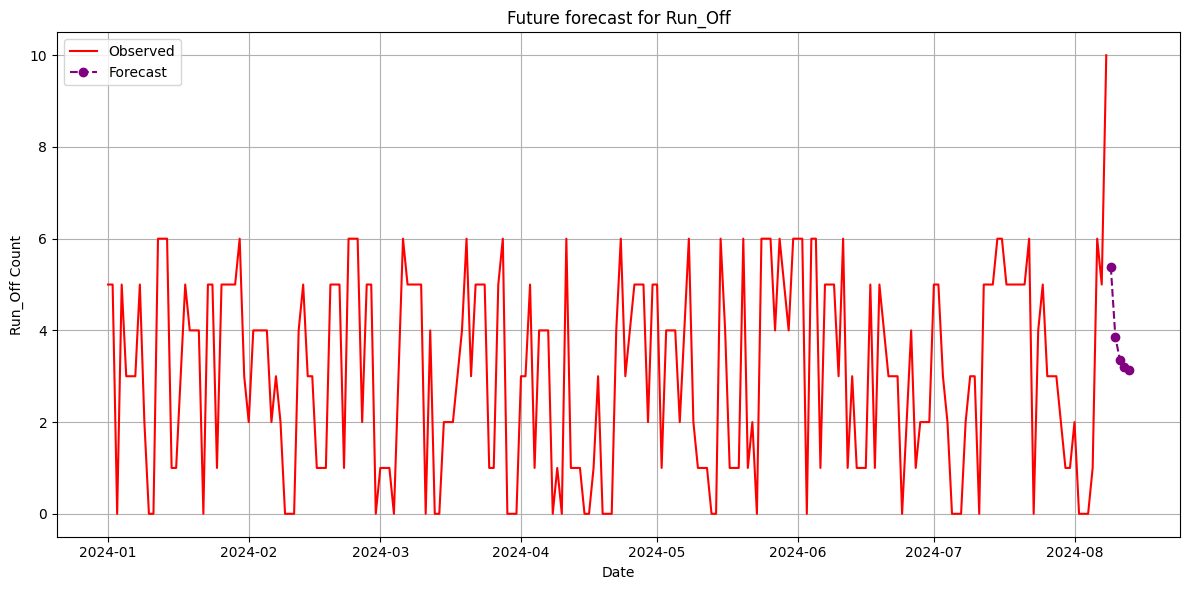

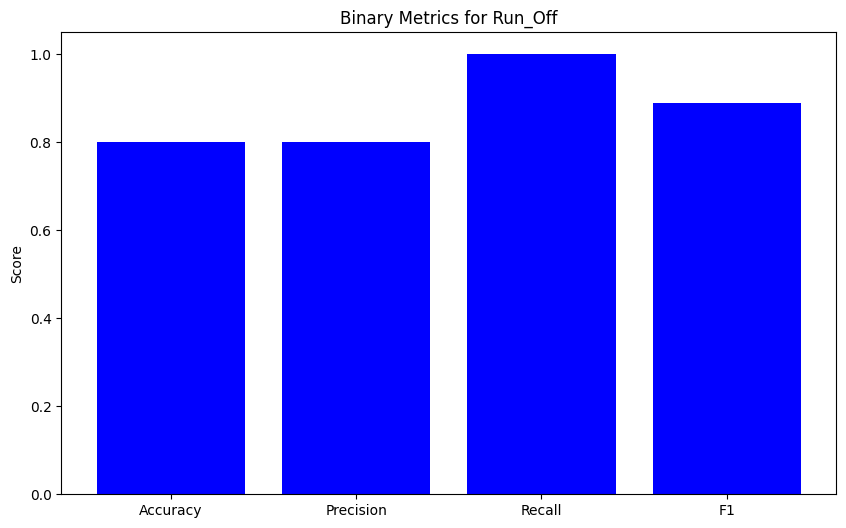

Training ARIMA model for Open_Seam...
RMSE for Open_Seam: 1.566953763602968
Metrics for Open_Seam:
  - Accuracy: 0.8
  - Precision: 0.8
  - Recall: 1.0
  - F1 Score: 0.8888888888888888
----------------------------------------------------------------


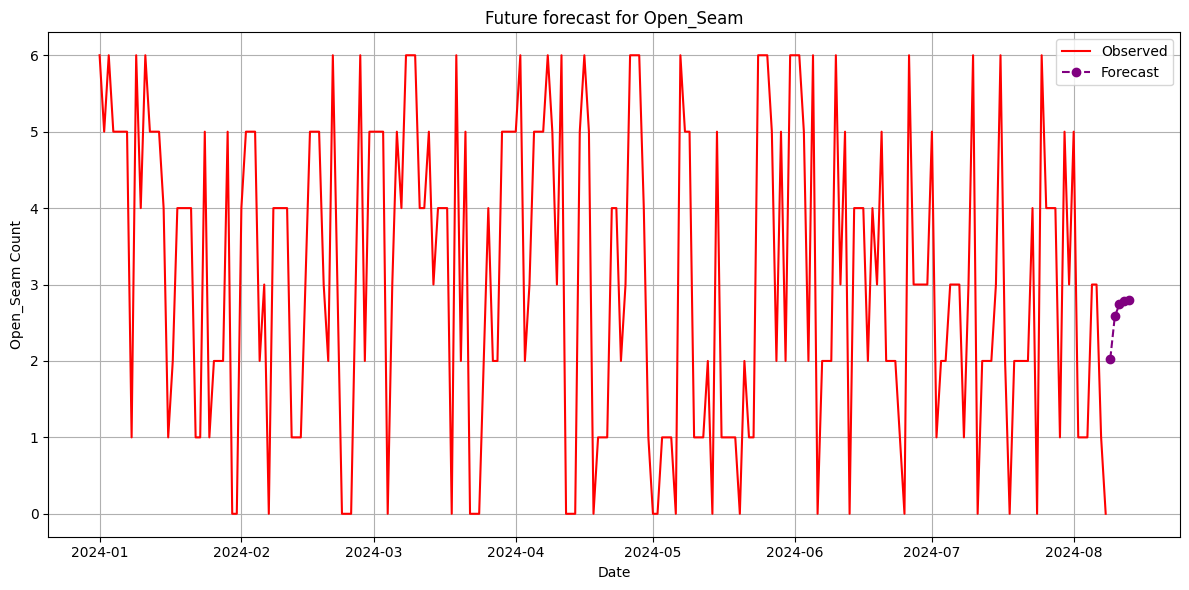

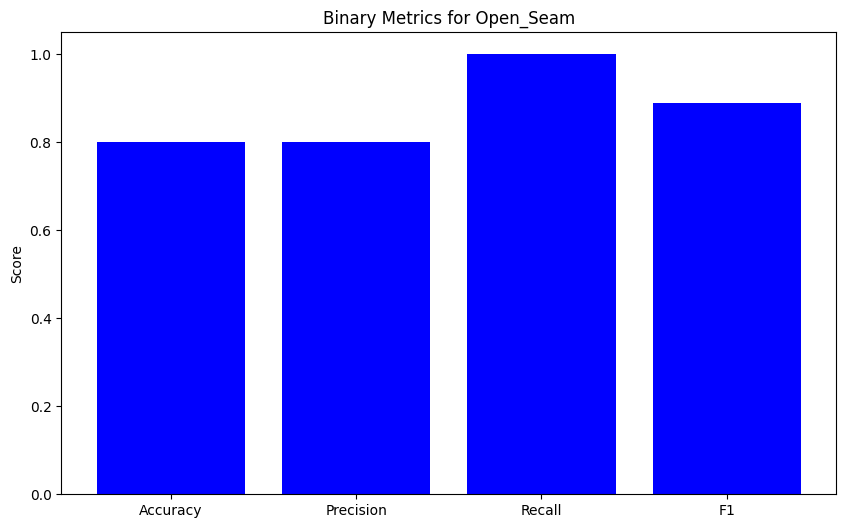

Training ARIMA model for SPI_Errors...
RMSE for SPI_Errors: 2.2473513770719227
Metrics for SPI_Errors:
  - Accuracy: 0.6
  - Precision: 0.6
  - Recall: 1.0
  - F1 Score: 0.75
----------------------------------------------------------------


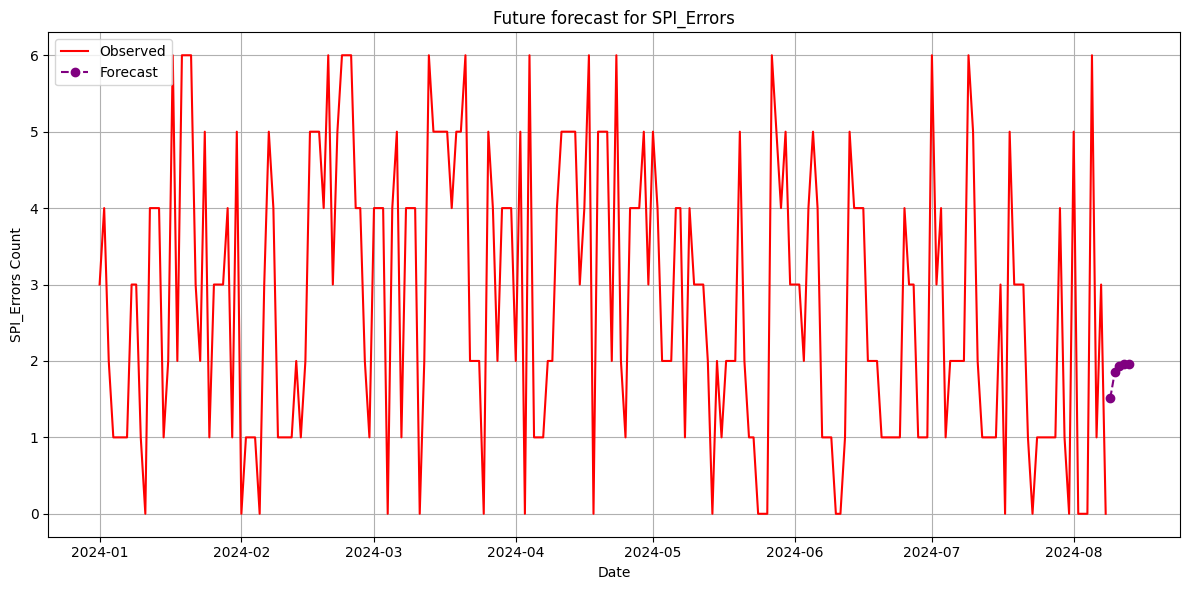

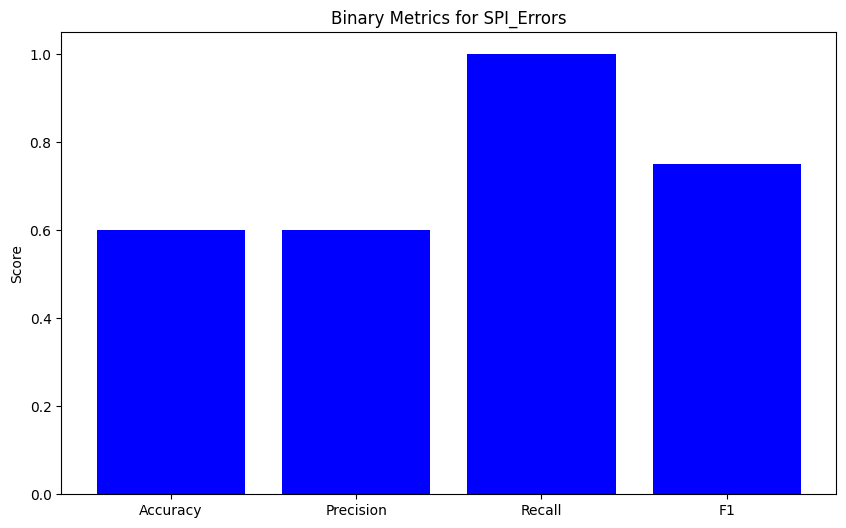

Training ARIMA model for High_Low...
RMSE for High_Low: 1.904576140175854
Metrics for High_Low:
  - Accuracy: 0.8
  - Precision: 0.8
  - Recall: 1.0
  - F1 Score: 0.8888888888888888
----------------------------------------------------------------


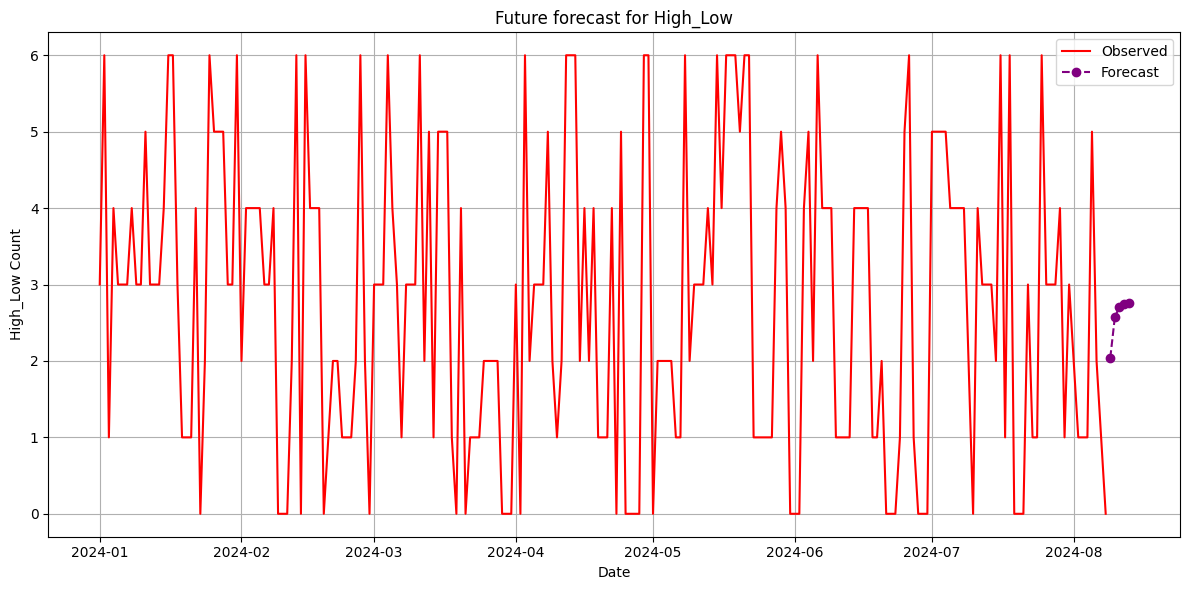

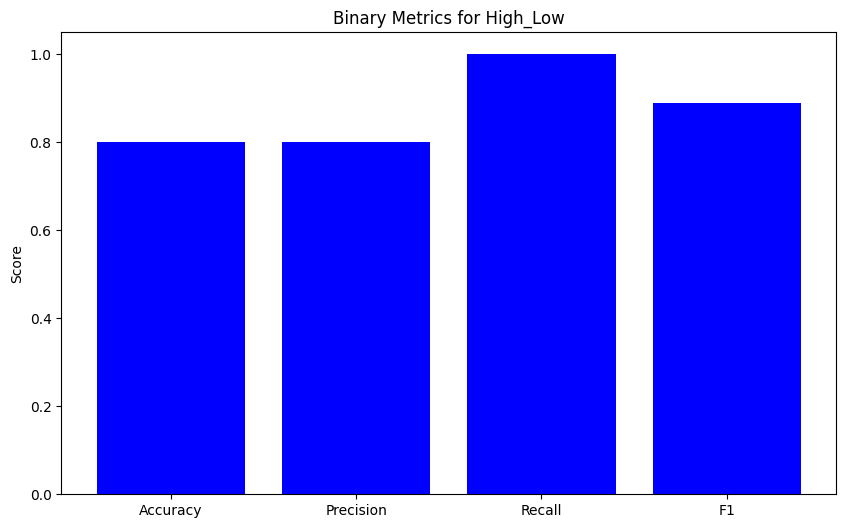

Forecasts saved to /Users/minu/Desktop/R24-066/Component 04/Dataset/worker_forecasts_dataset/time_series_forecasts.csv
Binary forecasts saved to /Users/minu/Desktop/R24-066/Component 04/Dataset/worker_binary_dataset/binary_forecasts.csv


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import joblib
import os

# Load the data
data_path = '/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv'
df = pd.read_csv(data_path)

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Identify and drop duplicate dates, keeping the first occurrence
df = df[~df.index.duplicated(keep='first')]

# Ensure the index has a defined frequency (assuming daily data here)
df = df.asfreq('D') 

# Fill missing values if any
df = df.fillna(method='ffill').fillna(method='bfill')

# List of defect types to model
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Directories for saving models and forecasts
forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_forecasts_dataset'
binary_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_binary_dataset'
model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(binary_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(1, 1, 1), steps=5):
    """Train an ARIMA model and forecast future data."""
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast

def calculate_rmse(actual, forecast):
    """Calculate Root Mean Squared Error between actual and forecasted values."""
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return rmse

def to_binary_classification(series, threshold):
    """Convert a time series to binary classification based on a threshold."""
    return (series > threshold).astype(int)

# Prepare DataFrame to store forecasts
time_series_forecasts = pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=6, freq='D')[1:])

# Prepare DataFrame to store binary forecasts and actuals
binary_forecasts = pd.DataFrame(index=time_series_forecasts.index)
binary_actuals = pd.DataFrame(index=df.index[-5:])

# Example threshold for binary classification
threshold = 0 

# Train ARIMA models for each defect type and make forecasts
for defect_type in defect_types:
    print(f"Training ARIMA model for {defect_type}...")
    try:
        # Train the model and make forecast
        model_fit, forecast = train_arima_model(df[defect_type], order=(1, 1, 1), steps=5)
        time_series_forecasts[defect_type] = forecast

        # Convert forecast and actuals to binary
        binary_forecast = to_binary_classification(forecast, threshold)
        binary_forecasts[defect_type] = binary_forecast

        binary_actual = to_binary_classification(df[defect_type][-5:], threshold)
        binary_actuals[defect_type] = binary_actual

        # Calculate RMSE
        if len(df[defect_type]) >= 5:
            rmse = calculate_rmse(df[defect_type][-5:], forecast)
            print(f"RMSE for {defect_type}: {rmse}")

        # Calculate binary classification metrics
        accuracy = accuracy_score(binary_actual, binary_forecast)
        precision = precision_score(binary_actual, binary_forecast)
        recall = recall_score(binary_actual, binary_forecast)
        f1 = f1_score(binary_actual, binary_forecast)

        print(f"Metrics for {defect_type}:")
        print(f"  - Accuracy: {accuracy}")
        print(f"  - Precision: {precision}")
        print(f"  - Recall: {recall}")
        print(f"  - F1 Score: {f1}")
        print('----------------------------------------------------------------')

        # Plotting the results
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df[defect_type], label='Observed', color='red')
        future_dates = pd.date_range(start=df.index[-1], periods=6, freq='D')[1:]
        plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
        plt.title(f'Future forecast for {defect_type}')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plotting the binary metrics
        plt.figure(figsize=(10, 6))
        plt.bar(['Accuracy', 'Precision', 'Recall', 'F1'], [accuracy, precision, recall, f1], color='blue')
        plt.title(f'Binary Metrics for {defect_type}')
        plt.ylabel('Score')
        plt.show()

        # Save the model
        model_file = os.path.join(model_output_dir, f'arima_model_{defect_type}.pkl')
        joblib.dump(model_fit, model_file)
    except Exception as e:
        print(f"An error occurred for {defect_type}: {e}")
        import traceback
        traceback.print_exc()

# Save all forecasts to a CSV file
forecast_file_path = os.path.join(forecast_output_dir, 'time_series_forecasts.csv')
time_series_forecasts.to_csv(forecast_file_path)
print(f"Forecasts saved to {forecast_file_path}")

# Save binary forecasts if needed
binary_forecasts_file_path = os.path.join(binary_output_dir, 'binary_forecasts.csv')
binary_forecasts.to_csv(binary_forecasts_file_path)
print(f"Binary forecasts saved to {binary_forecasts_file_path}")

## Comparison Metrics

In [20]:
# Prepare a DataFrame to store all metrics
comparison_metrics = pd.DataFrame(index=defect_types, columns=['RMSE', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Populate the DataFrame with metrics
for defect_type in defect_types:
    model_fit, forecast = train_arima_model(df[defect_type], order=(1, 1, 1), steps=5)
    binary_forecast = to_binary_classification(forecast, threshold)
    binary_actual = to_binary_classification(df[defect_type][-5:], threshold)
    
    # Calculate metrics
    rmse = calculate_rmse(df[defect_type][-5:], forecast)
    accuracy = accuracy_score(binary_actual, binary_forecast)
    precision = precision_score(binary_actual, binary_forecast)
    recall = recall_score(binary_actual, binary_forecast)
    f1 = f1_score(binary_actual, binary_forecast)
    
    # Store metrics in DataFrame
    comparison_metrics.loc[defect_type] = [rmse, accuracy, precision, recall, f1]

# Display the comparison table
print(comparison_metrics)

                RMSE Accuracy Precision Recall  F1 Score
Run_Off     4.347774      0.8       0.8    1.0  0.888889
Open_Seam   1.566954      0.8       0.8    1.0  0.888889
SPI_Errors  2.247351      0.6       0.6    1.0      0.75
High_Low    1.904576      0.8       0.8    1.0  0.888889


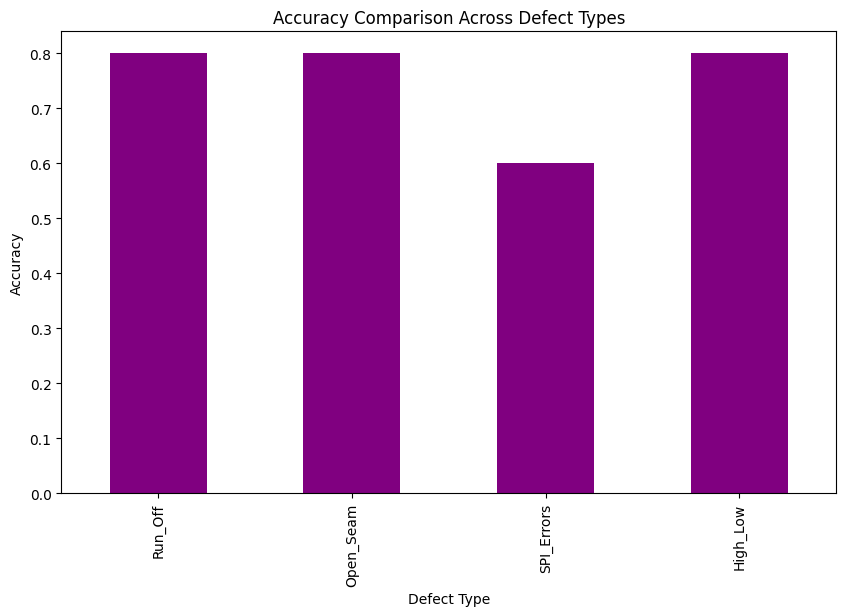

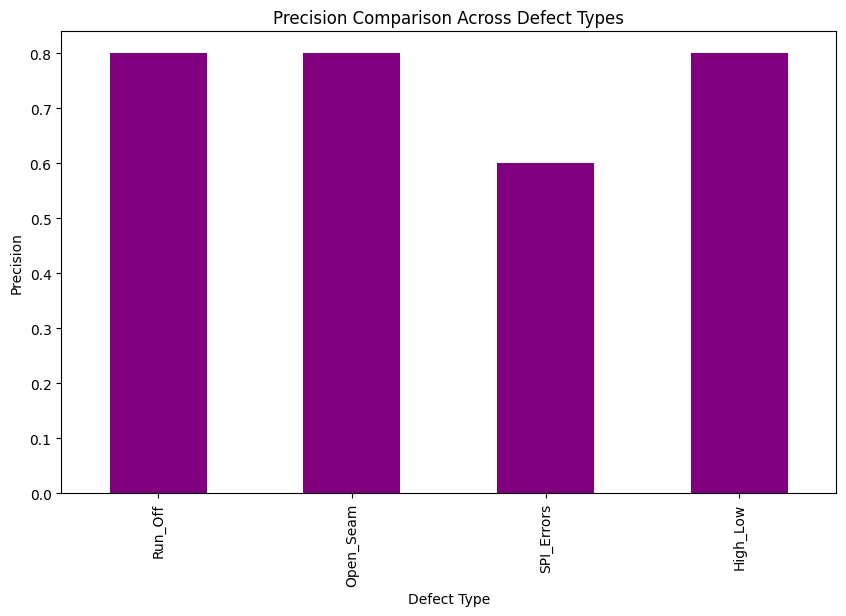

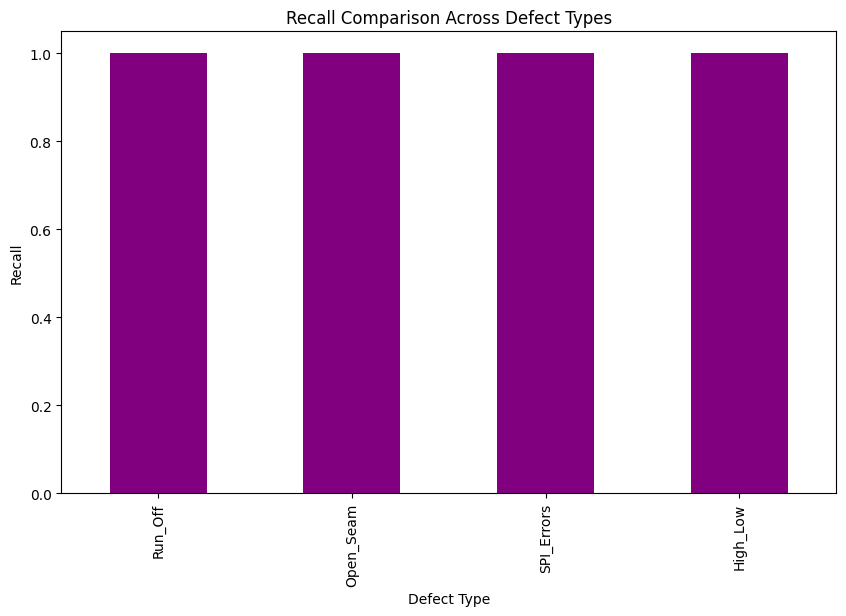

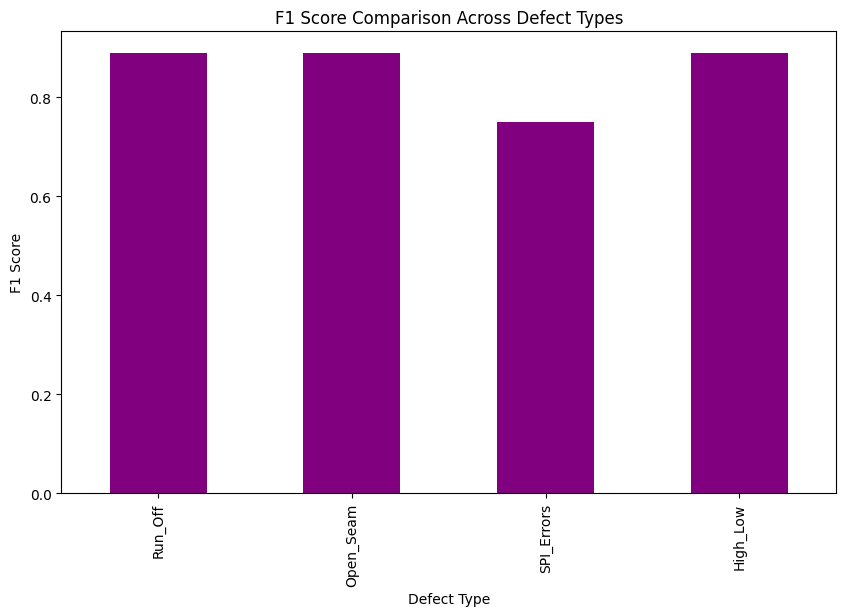

In [21]:
binary_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in binary_metrics:
    plt.figure(figsize=(10, 6))
    comparison_metrics[metric].plot(kind='bar', color='purple')
    plt.title(f'{metric} Comparison Across Defect Types')
    plt.xlabel('Defect Type')
    plt.ylabel(metric)
    plt.show()